# Exercises: Data Analysis with Python

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Snell's law
The following data was measured by two students for the refraction of light going from air to acrylic glass. The first array contains the angles for the incoming lightrays, the second array the corresponding angles for the refracted rays. All angles were measured in degrees.

In [10]:
al = np.arange(6, 90, 6)
be = np.array([3, 8, 11, 16, 20, 23, 26.5, 30, 33, 35.5, 38, 40, 41, 42])

Convert the angles to radians and add arrays for the sine of the angles. Assuming a measurement error of 0.5°, determine the errors of the sine values.

In [11]:
al_rad = np.radians(al)
be_rad = np.radians(be)
d = np.radians(0.5)

sin_al = np.sin(al_rad)
sin_be = np.sin(be_rad)

d_sin_al = np.sin(al_rad+d) - np.sin(al_rad)
d_sin_be = np.sin(be_rad+d) - np.sin(be_rad)

Graph the sine of the incoming angle vs. the sine of the refractive angle (with error bars). Fit a straight line through the origin to the data and determine its slope (including statistical error), which corresponds to the refractive index.

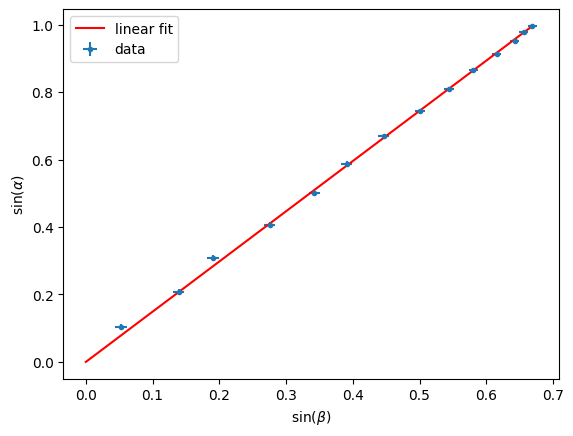

In [12]:
from scipy.optimize import curve_fit
def f(x, n):
    return n * x

coeff1, pcov1 = curve_fit(f, sin_be, sin_al)
n1 = coeff1[0]

x = np.linspace(0, sin_be[-1], 100)
y = f(x, n1)

plt.xlabel(r'$\sin(\beta)$')
plt.ylabel(r'$\sin(\alpha)$')
plt.errorbar(sin_be, sin_al, xerr=d_sin_be, yerr=d_sin_al, fmt='.', label='data')
plt.plot(x, y, color='red', label='linear fit')
plt.legend()

In [13]:
dn1 = np.sqrt(pcov1[0, 0])
print(f'The refractive index is n = {n1:.3f} ± {dn1:.3f}')

The refractive index is n = 1.489 ± 0.006


This value is compatible with typical values for acrylic glass.

Alternatively, the value for the refractive index can be determined by graphing the angles directly and then fitting a more complicated function: \
$\sin(\alpha) = n \sin(\beta) \Longrightarrow \alpha = \arcsin\left(n \sin(\beta)\right)$

/var/folders/cw/fhwkg74n2lj7xsz8sz50xz1r0000gn/T/ipykernel_44289/1880491181.py:2: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(n * np.sin(x))


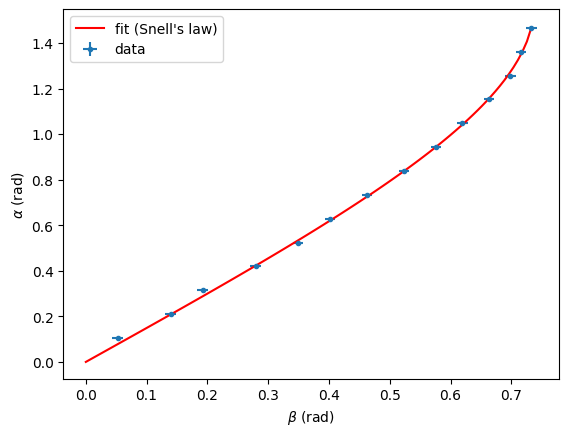

In [14]:
def g(x, n):
    return np.arcsin(n * np.sin(x))

coeff2, pcov2 = curve_fit(g, be_rad, al_rad)
n2 = coeff2[0]

u = np.linspace(0, be_rad[-1], 100)
v = g(u, n2)

plt.xlabel(r'$\beta$ (rad)')
plt.ylabel(r'$\alpha$ (rad)')
plt.errorbar(be_rad, al_rad, xerr=d, yerr=d, fmt='.', label='data')
plt.plot(u, v, color='red', label="fit (Snell's law)")
plt.legend()

In [16]:
dn2 = np.sqrt(pcov2[0, 0])
print(f'The refractive index is n = {n2:.3f} ± {dn2:.3f}')

The refractive index is n = 1.487 ± 0.002


The results of the two approaches are compatible.

Create the residual plots for both curve fits.

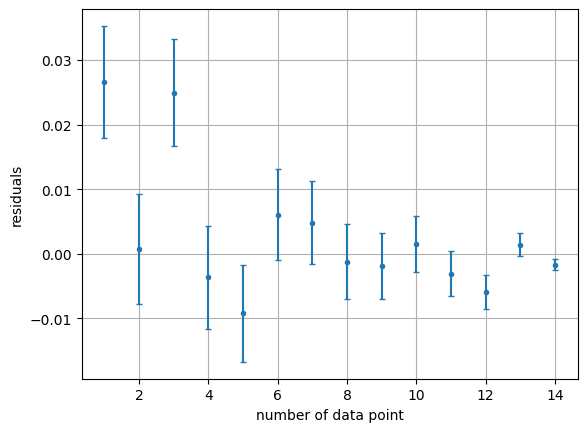

In [17]:
n_datapoint = range(1, len(al)+1)

res1 = sin_al - f(sin_be, n1)

plt.xlabel('number of data point')
plt.ylabel('residuals')
plt.errorbar(n_datapoint, res1, yerr=d_sin_al, fmt='.', capsize=2)
plt.grid()

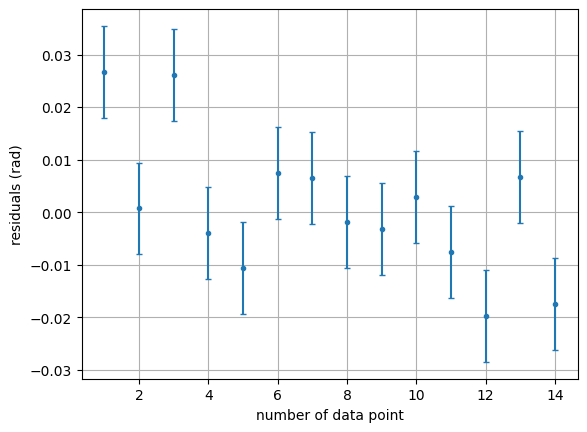

In [18]:
res2 = al_rad - g(be_rad, n1)

plt.xlabel('number of data point')
plt.ylabel('residuals (rad)')
plt.errorbar(n_datapoint, res2, yerr=d, fmt='.', capsize=2)
plt.grid()

Both residual plots look similar. For five of the 14 data points the deviation from the theoretical model is greater than the error range. This is probably due to an over-optimistic error estimate.